<a href="https://colab.research.google.com/github/josue2510/Data_science_2020_election_support/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
!pip install nltk

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
from textblob import TextBlob#libreria para procesar datos de texto
import nltk#kit de herramientas de lenguaje natural
import pandas as pd
from collections import Counter#subclase que cuenta objetos y almacena los elementos en un diccionario
from matplotlib import pyplot as plt
import numpy as np
from  tqdm import tqdm#libreria que mide el progreso de los loops
import warnings; warnings.simplefilter('ignore')
import seaborn as sns

pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [151]:
#tweets = pd.read_csv('/content/drive/MyDrive/tweets.csv', sep=',')
tweets = pd.read_csv('/content/drive/MyDrive/TIC/data/tweetsfixed.csv', sep=',')
tweets.tweet = tweets.tweet.astype(str)

In [152]:
#Contamos la cantidad de veces que se repite el nombre de un candidato en cada tweet
count = []
for i in tqdm(range(tweets.shape[0])):
    count.append({'biden': tweets['tweet'].iloc[i].count('biden'),
                  'trump': tweets['tweet'].iloc[i].count('trump')})
candidates_count = pd.DataFrame.from_dict(count)
tweets = tweets.join(candidates_count)

100%|██████████| 2038732/2038732 [00:55<00:00, 36747.77it/s]


In [153]:
def getPolarity(text):
  '''Calcula la polaridad del texto recibido
    Args:
        text: str
    Returns: float
  '''
  return TextBlob(text).sentiment.polarity
def getAnalysis(score):
  '''Clasifica el texto en base a la polaridad obtenida
    Args:
        score: float
    Returns: str
  '''
  if score < 0:
    return 'negative'
  elif score==0:
    return 'neutral'
  else:
     return 'positive'

In [154]:
tweets['polarity']    = tweets['tweet'].apply(getPolarity)
tweets['analysis']    = tweets['polarity'].apply(getAnalysis)
tweets.to_csv("/content/drive/MyDrive/TIC/data/tweetsSentiment.csv", sep=',', index=False)
tweets.head()

,tweet,likes,retweets,date,biden,trump,polarity,analysis
0,elecciones2020 florida joebiden dice donaldtrump solo preocupa mismo demcrata anfitrin encuentros electores pembrokepines miramar clic aqu elsollatino yobrilloconelsol,0,0,2020-10-15,1,1,0.000000,neutral
1,usa 2020 trump contro facebook twitter coprono biden donaldtrump,26,9,2020-10-15,1,2,0.000000,neutral
2,trump student used hear years ten years heard china 2019 15 dont know many asked many said sir dont know millions like 300 millionum,2,1,2020-10-15,0,1,0.333333,positive
3,hours since last tweet trump maybe busy tremendously busy,0,0,2020-10-15,0,1,0.066667,positive
4,get tie get tie trump rally iowa,4,3,2020-10-15,0,1,0.000000,neutral


In [155]:
def text_plot(y):
  for c, value in enumerate(y): 
    plt.text(c-0.08, value, str(value)) 

Text(0.5, 1.0, 'Análisis de sentimientos')

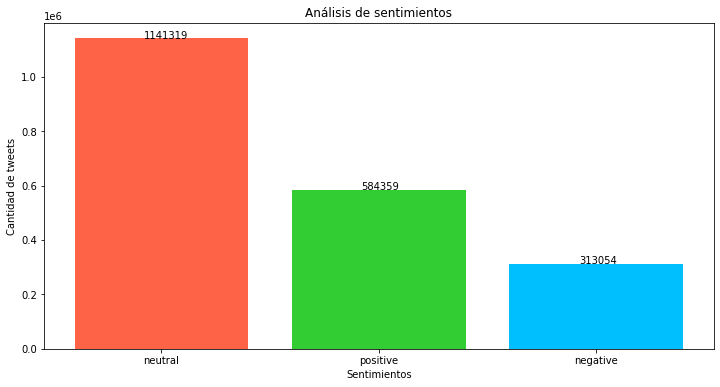

In [156]:
#Representación de la cantidad de tweets positivos, negativos y neutrales
sentiment_cnt = Counter(tweets.analysis)
plt.figure(figsize=(12,6))
plt.bar(sentiment_cnt.keys(), sentiment_cnt.values(), color=['tomato', 'limegreen', 'deepskyblue'])
text_plot(sentiment_cnt.values())
plt.xlabel('Sentimientos')
plt.ylabel('Cantidad de tweets')
plt.title('Análisis de sentimientos')

In [157]:
sentiment_cnt = Counter(tweets.analysis)
sentiment_cnt

Counter({'negative': 313054, 'neutral': 1141319, 'positive': 584359})

In [158]:
def flatten(l):
    """ La funcion aplana una lista de listas 
        
        args:
            l (): lista de listas
        return : lista aplanada
    """
    return [item for sublist in l for item in sublist]

Text(0.5, 1.0, 'Análisis de sentimientos tweets con más likes.')

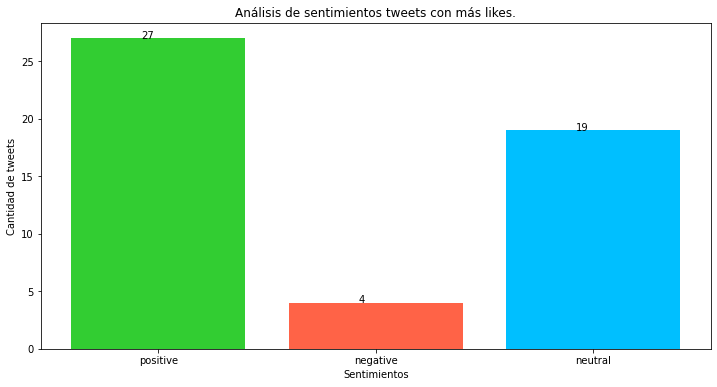

In [159]:
#Twitters más virales de acuerdo a la cantidad de likes
most_liked = tweets.sort_values('likes', ascending= False).head(50)
sentiment_cnt = Counter(most_liked.analysis)
plt.figure(figsize=(12,6))
plt.bar(sentiment_cnt.keys(), sentiment_cnt.values(), color=['limegreen', 'tomato', 'deepskyblue'])
text_plot(sentiment_cnt.values())
plt.xlabel('Sentimientos')
plt.ylabel('Cantidad de tweets')
plt.title("Análisis de sentimientos tweets con más likes.")

In [160]:
#Separamos las 10 palabras mas usadas en los tweets mas virales segun los likes
tweets_viral_likes = [tweet.split() for tweet in most_liked['tweet']]
tweets_viral_likes = flatten(tweets_viral_likes)
fdist1 = nltk.FreqDist(tweets_viral_likes)
fdist1.most_common(30)

[('election2020', 25),
 ('trump', 17),
 ('joebiden', 15),
 ('biden', 15),
 ('vote', 15),
 ('president', 10),
 ('amp', 9),
 ('im', 8),
 ('count', 7),
 ('hes', 6),
 ('every', 6),
 ('america', 6),
 ('electionresults2020', 6),
 ('election', 6),
 ('pennsylvania', 5),
 ('one', 5),
 ('big', 5),
 ('win', 5),
 ('joe', 5),
 ('woman', 4),
 ('good', 4),
 ('please', 4),
 ('see', 4),
 ('kamalaharris', 4),
 ('bidenharris2020', 4),
 ('state', 4),
 ('us', 4),
 ('votes', 4),
 ('fraud', 4),
 ('legal', 4)]

Text(0.5, 1.0, 'Análisis de sentimientos tweets con más retweets.')

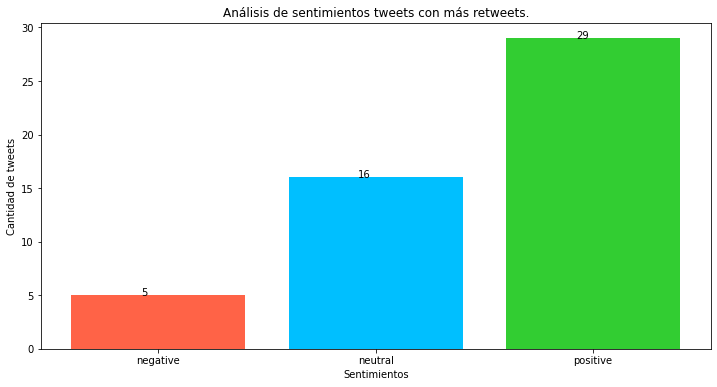

In [161]:
#Twitters más virales de acuerdo a la cantidad de retweets
most_retweeted = tweets.sort_values('retweets', ascending= False).head(50)
sentiment_cnt = Counter(most_retweeted.analysis)
plt.figure(figsize=(12,6))
plt.bar(sentiment_cnt.keys(), sentiment_cnt.values(), color=['tomato','deepskyblue', 'limegreen'])
text_plot(sentiment_cnt.values())
plt.xlabel('Sentimientos')
plt.ylabel('Cantidad de tweets')
plt.title("Análisis de sentimientos tweets con más retweets.")

In [162]:
#Separamos las 10 palabras mas usadas en los tweets mas virales segun los retweets
tweets_viral_retweet = [tweet.split() for tweet in most_retweeted['tweet']]
tweets_viral_retweet = flatten(tweets_viral_retweet)
fdist1 = nltk.FreqDist(tweets_viral_retweet)
fdist1.most_common(30)

[('election2020', 27),
 ('trump', 18),
 ('joebiden', 16),
 ('biden', 15),
 ('president', 11),
 ('vote', 10),
 ('amp', 9),
 ('im', 8),
 ('count', 7),
 ('election', 7),
 ('america', 6),
 ('electionresults2020', 6),
 ('fraud', 6),
 ('hes', 6),
 ('joe', 6),
 ('every', 5),
 ('one', 5),
 ('pennsylvania', 5),
 ('win', 5),
 ('white', 5),
 ('house', 5),
 ('first', 5),
 ('twitter', 4),
 ('please', 4),
 ('bidenharris2020', 4),
 ('woman', 4),
 ('good', 4),
 ('big', 4),
 ('see', 4),
 ('like', 4)]

Text(0.5, 1.0, 'Análisis de sentimientos tweets que mencionan más a Biden.')

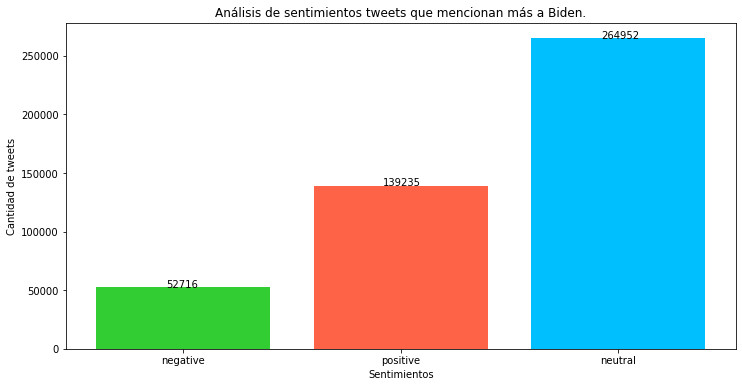

In [163]:
#Sentimiento de los tweets que mencionan a Biden y no a Trump
biden_tweets = tweets[tweets.biden.apply(lambda x: x>0) & tweets.trump.apply(lambda x: x==0)]
sentiment_cnt = Counter(biden_tweets.analysis)
plt.figure(figsize=(12,6))
plt.bar(sentiment_cnt.keys(), sentiment_cnt.values(), color=['limegreen','tomato', 'deepskyblue'])
text_plot(sentiment_cnt.values())
plt.xlabel('Sentimientos')
plt.ylabel('Cantidad de tweets')
plt.title("Análisis de sentimientos tweets que mencionan más a Biden.")

Text(0.5, 1.0, 'Análisis de sentimientos tweets que mencionan más a Trump.')

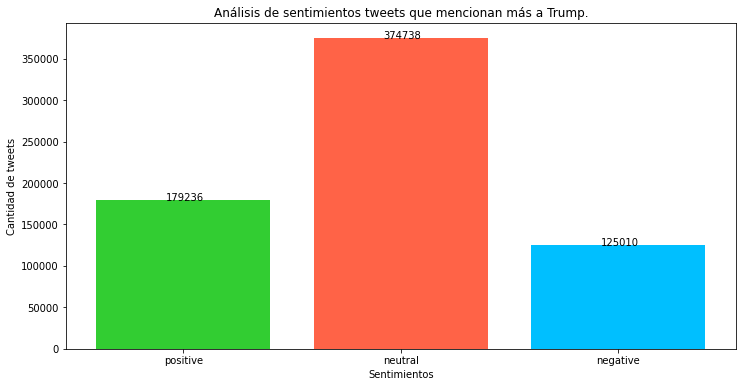

In [164]:
#Sentimiento de los tweets que mencionan a Trump y no a Biden
trump_tweets = tweets[tweets.trump.apply(lambda x: x>0) & tweets.biden.apply(lambda x: x==0)]
target_cnt = Counter(trump_tweets.analysis)
plt.figure(figsize=(12,6))
plt.bar(target_cnt.keys(), target_cnt.values(), color=['limegreen','tomato', 'deepskyblue'])
text_plot(target_cnt.values())
plt.xlabel('Sentimientos')
plt.ylabel('Cantidad de tweets')
plt.title("Análisis de sentimientos tweets que mencionan más a Trump.")